# Implementation of Logistic Regression using Python

## Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and View Dataset

In [25]:
data_set = pd.read_csv('LogisticRegressionDataset.csv')
data_set.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [26]:
data_set.describe()

,Age,Salary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [27]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Defining Independent (X) and Dependent (y) variables

In [28]:
X = data_set.iloc[:,:-1]
X.head()

,Age,Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [29]:
y = data_set.iloc[:,-1:]
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


## Data Visulization (Bar Plot)

In [30]:
# Import Libraries for Data Visulization
import plotly.graph_objects as go

# Count the total outputs (0 and 1) from "Purchased" column
purchased = data_set['Purchased'].value_counts().reset_index()

# Divide the output classes into two sections
fig = go.Figure(data=[go.Bar(x = ['not-purchased', 'purchased'], y = purchased['Purchased'], text=purchased['Purchased'], textposition='auto')])

# Customize aspect
fig.update_layout(margin=dict(l=10, r=10, t=20, b=20), paper_bgcolor="LightSteelBlue")
fig.update_traces(marker_color='rgb(160,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=1)
fig.update_layout(autosize=False, width=750, height=350)            
fig.show()

## Datavisualization (pi chart)

In [31]:
import plotly.express as px

purchased.iloc[0,0] = "Not_Purchased"
purchased.iloc[1,0] = "Purchased"

colors = ['gold', 'mediumturquoise']

fig = px.pie(purchased, values='Purchased', names = 'index', color_discrete_sequence=px.colors.sequential.RdBu)

#fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(autosize=False, width=750, height=350)

fig.update_layout(margin=dict(l=10, r=10, t=20, b=20), paper_bgcolor="LightBlue",)

fig.show()

In [32]:
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(autosize=False, width=750, height=350)

fig.update_layout(margin=dict(l=10, r=10, t=20, b=20), paper_bgcolor="LightBlue",)

fig.show()

## Train and Test Logistic Regression Model

###  Spliting the Data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

##### Now, let’s apply the scaling method to the independent data so that the outliers would not affect the predicting class.

In [34]:
from sklearn.preprocessing import StandardScaler

scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.fit_transform(X_test)

## Model Training (Binary Classification)

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

### Calculating model accuracy

In [36]:
# testing the model
y_pred = model.predict(X_test)

# calculating model accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)*100
print("Accuracy Score of Model is %.2f percent" %score)

Accuracy Score of Model is 88.75 percent


## Visualizing training dataset

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


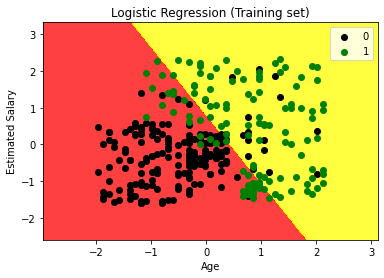

In [37]:
# import libraries
from matplotlib.colors import ListedColormap  

# setting x_train and y_train
x_set, y_set = X_train, y_train  
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step=0.01),  
np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))  

# ploting 
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red','yellow')))
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max()) 

# for-loop for data iteration
y_set_one_dimension = y_set.iloc[:,0]
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1], c = ListedColormap(('black', 'green'))(i), label = j) 
    
# labeling the graph
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()

In [38]:
y_set.shape

(320, 1)

In [39]:
y_set_one_dimension.shape

(320,)

## Visualizing test dataset

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


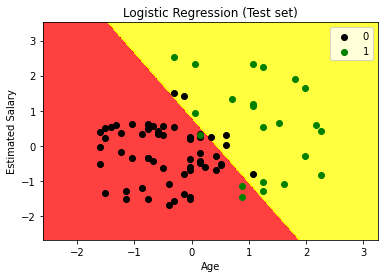

In [40]:
# import libraries
from matplotlib.colors import ListedColormap  

# setting x_test and y_test
x_set, y_set = X_test, y_test  
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step=0.01),  
np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))  

# ploting 
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red','yellow')))
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max()) 

# for-loop for data iteration
y_set_one_dimension = y_set.iloc[:,0]
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1], c = ListedColormap(('black', 'green'))(i), label = j) 
    
# labeling the graph
plt.title('Logistic Regression (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()

## Evaluation of Logistic Regression algorithm for binary classification

### Calculate confusion matrix parameters

In [41]:
y_actual = y_test.iloc[:,0]

# initializing the values with zero value
TP = 0
FP = 0
TN = 0
FN = 0

# iterating through the values
for i in range(len(y_pred)): 
    if y_actual.iloc[i]==y_pred[i]==1:
           TP += 1
    if y_pred[i]==1 and y_actual.iloc[i]!=y_pred[i]:
           FP += 1
    if y_actual.iloc[i]==y_pred[i]==0:
           TN += 1
    if y_pred[i]==0 and y_actual.iloc[i]!=y_pred[i]:
           FN += 1

# printing the values
print("True Positive: ", TP)
print("False Positive:", FP)
print("True Negative: ", TN)
print("False Negative: ", FN)

True Positive:  19
False Positive: 6
True Negative:  52
False Negative:  3


### Visualize confusion matrix

<AxesSubplot:>

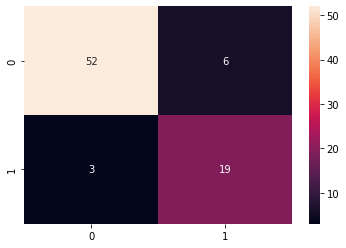

In [42]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
#plt.savefig('confusion.png')

### Classification report

In [43]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80

